# Noise Addition and Filtering Analysis

This notebook demonstrates:
1. Reading and converting an image to grayscale
2. Adding Gaussian and Salt & Pepper noise
3. Applying different size filters (3x3, 7x7, 15x15)
4. Analyzing filter performance against noise
5. Concluding which filter size works best

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

## 1. Reading and Converting Image to Grayscale

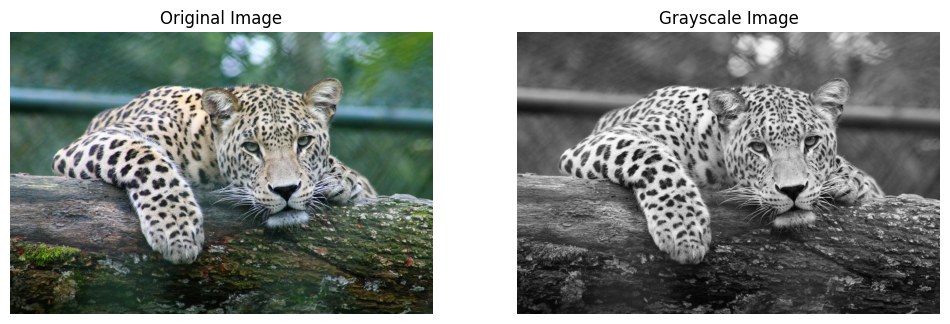

In [3]:
img = cv2.imread('gwen-weustink-I3C1sSXj1i8-unsplash.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

## 2. Adding Noise to Images

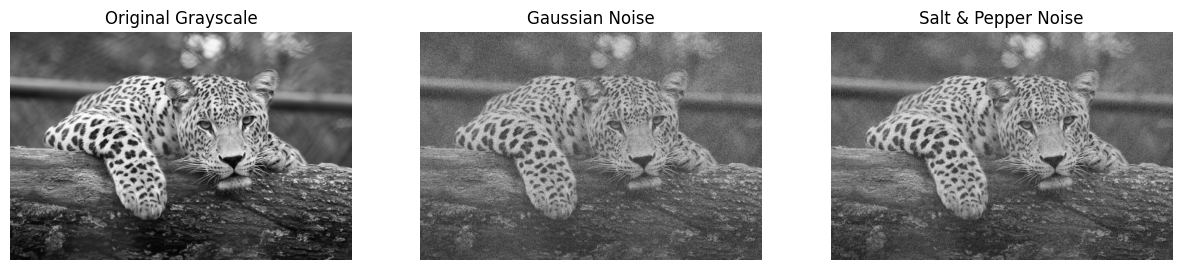

In [4]:
# Adding Gaussian noise
gaussian_noisy = random_noise(gray_img, mode='gaussian', mean=0, var=0.3)#0.01
gaussian_noisy = np.array(255 * gaussian_noisy, dtype='uint8')

# Adding Salt & Pepper noise
sp_noisy = random_noise(gray_img, mode='s&p', amount=0.3)#0.05
sp_noisy = np.array(255 * sp_noisy, dtype='uint8')

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')
plt.subplot(132)
plt.imshow(gaussian_noisy, cmap='gray')
plt.title('Gaussian Noise')
plt.axis('off')
plt.subplot(133)
plt.imshow(sp_noisy, cmap='gray')
plt.title('Salt & Pepper Noise')
plt.axis('off')
plt.show()

In [5]:
def measure_noise_level(original, noisy):
    # Calculating Mean Square Error
    mse = np.mean((original - noisy) ** 2)
    # Calculating Signal-to-Noise Ratio (SNR)
    if mse == 0:
        return float('inf')
    snr = 10 * np.log10(np.mean(original ** 2) / mse)
    return mse, snr

# Measure noise levels
mse_gaussian, snr_gaussian = measure_noise_level(gray_img, gaussian_noisy)
mse_sp, snr_sp = measure_noise_level(gray_img, sp_noisy)

print("Noise Measurements:")
print(f"Gaussian Noise - MSE: {mse_gaussian:.2f}, SNR: {snr_gaussian:.2f} dB")
print(f"Salt & Pepper - MSE: {mse_sp:.2f}, SNR: {snr_sp:.2f} dB")

Noise Measurements:
Gaussian Noise - MSE: 108.38, SNR: 0.17 dB
Salt & Pepper - MSE: 33.92, SNR: 5.21 dB


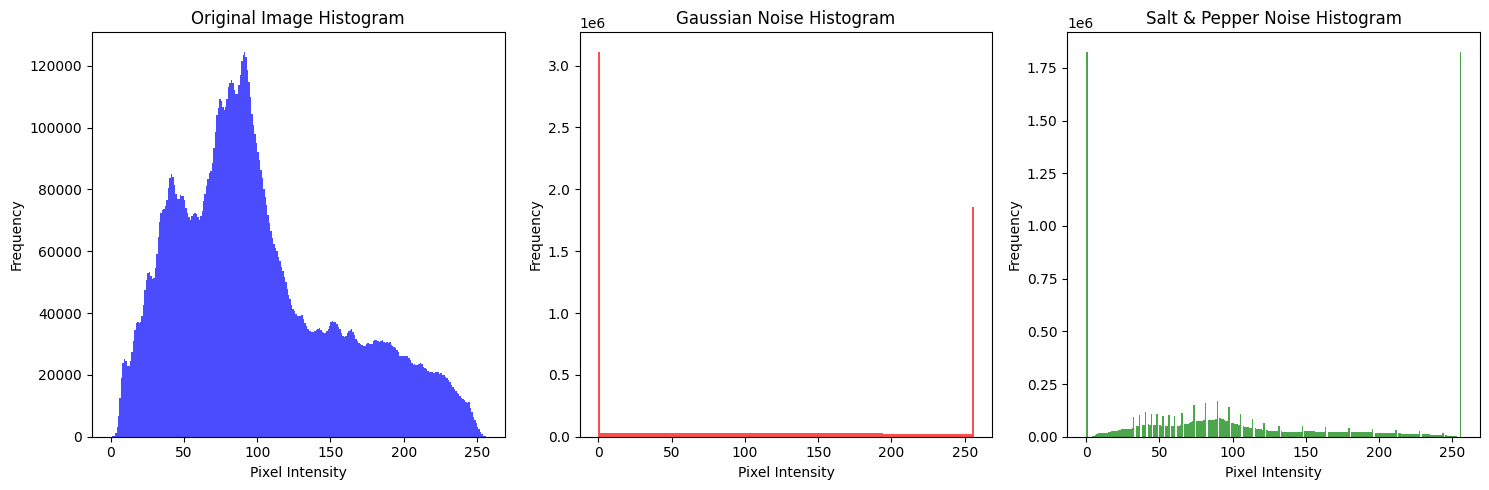

In [6]:
plt.figure(figsize=(15, 5))

# Original image histogram
plt.subplot(131)
plt.hist(gray_img.ravel(), 256, [0, 256], color='blue', alpha=0.7)
plt.title('Original Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Gaussian noise histogram
plt.subplot(132)
plt.hist(gaussian_noisy.ravel(), 256, [0, 256], color='red', alpha=0.7)
plt.title('Gaussian Noise Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Salt & Pepper noise histogram
plt.subplot(133)
plt.hist(sp_noisy.ravel(), 256, [0, 256], color='green', alpha=0.7)
plt.title('Salt & Pepper Noise Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 3. Applying Different Size Filters
### Median Filters and Gaussian Filters has further size divisions in the filters (3x3, 7x7, 15x15)

In [7]:
def apply_filters(noisy_img, kernel_sizes=[3, 7, 15]):
    median_filtered = []
    gaussian_filtered = []
    
    for size in kernel_sizes:
        # Apply median filter
        median = cv2.medianBlur(noisy_img, size)
        median_filtered.append(median)
        
        # Apply Gaussian filter
        gaussian = cv2.GaussianBlur(noisy_img, (size, size), 0)
        gaussian_filtered.append(gaussian)
        
    return median_filtered, gaussian_filtered

# Apply filters to both noisy images
gaussian_median_filtered, gaussian_gaussian_filtered = apply_filters(gaussian_noisy)
sp_median_filtered, sp_gaussian_filtered = apply_filters(sp_noisy)

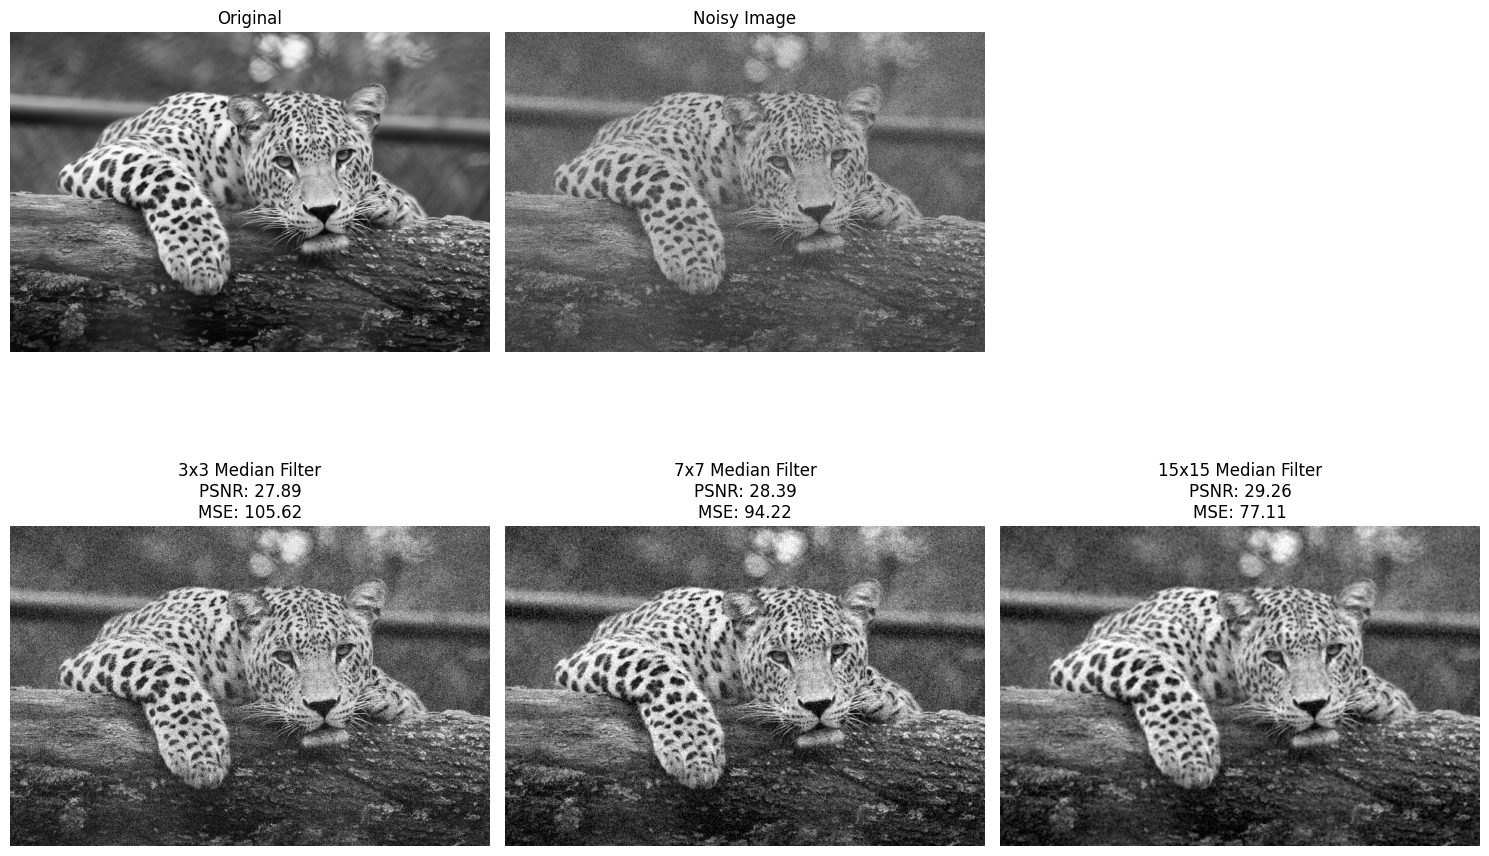

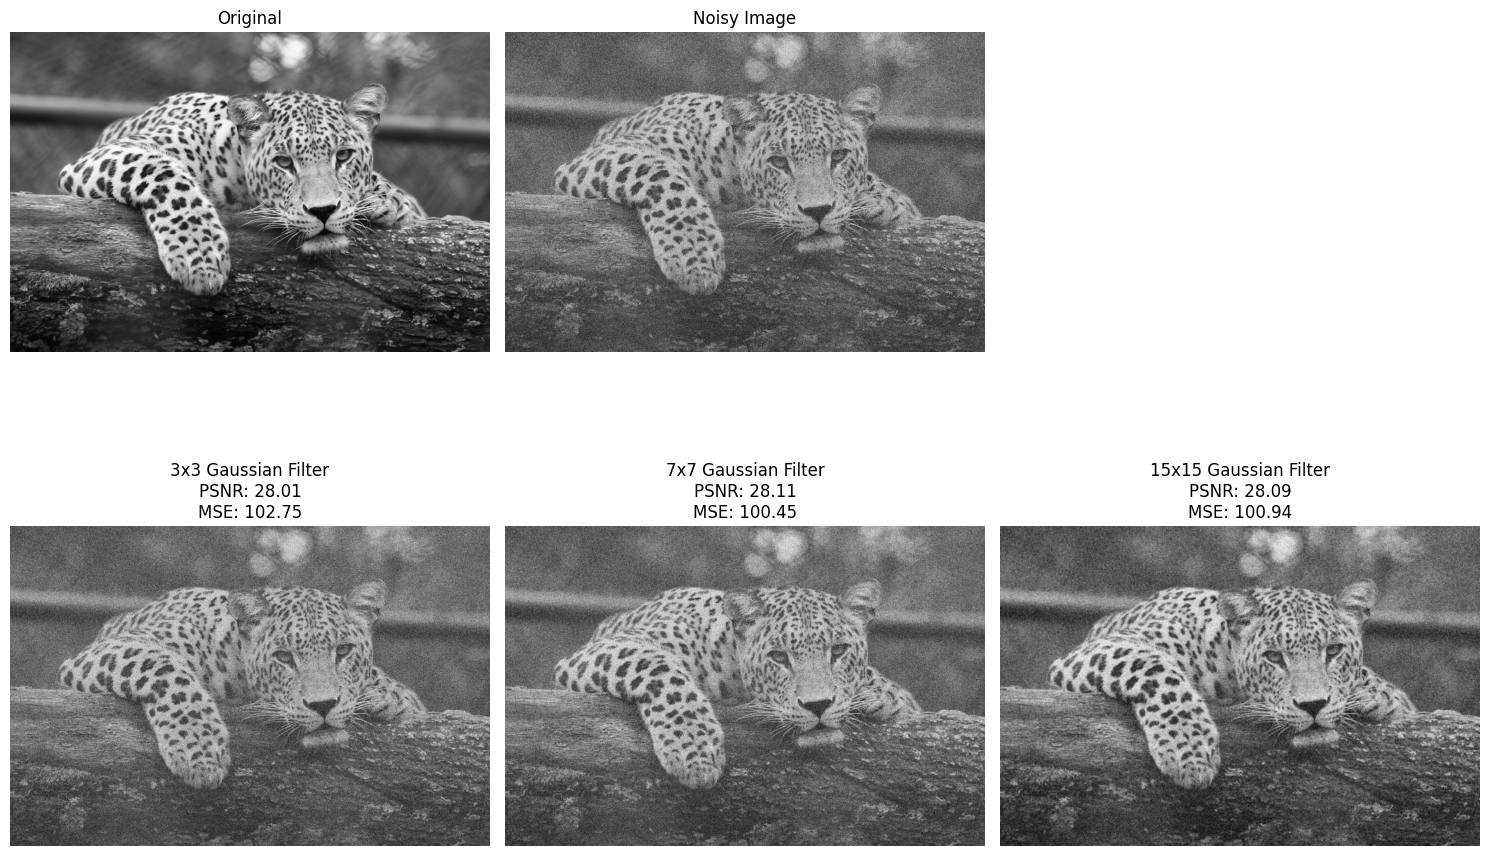

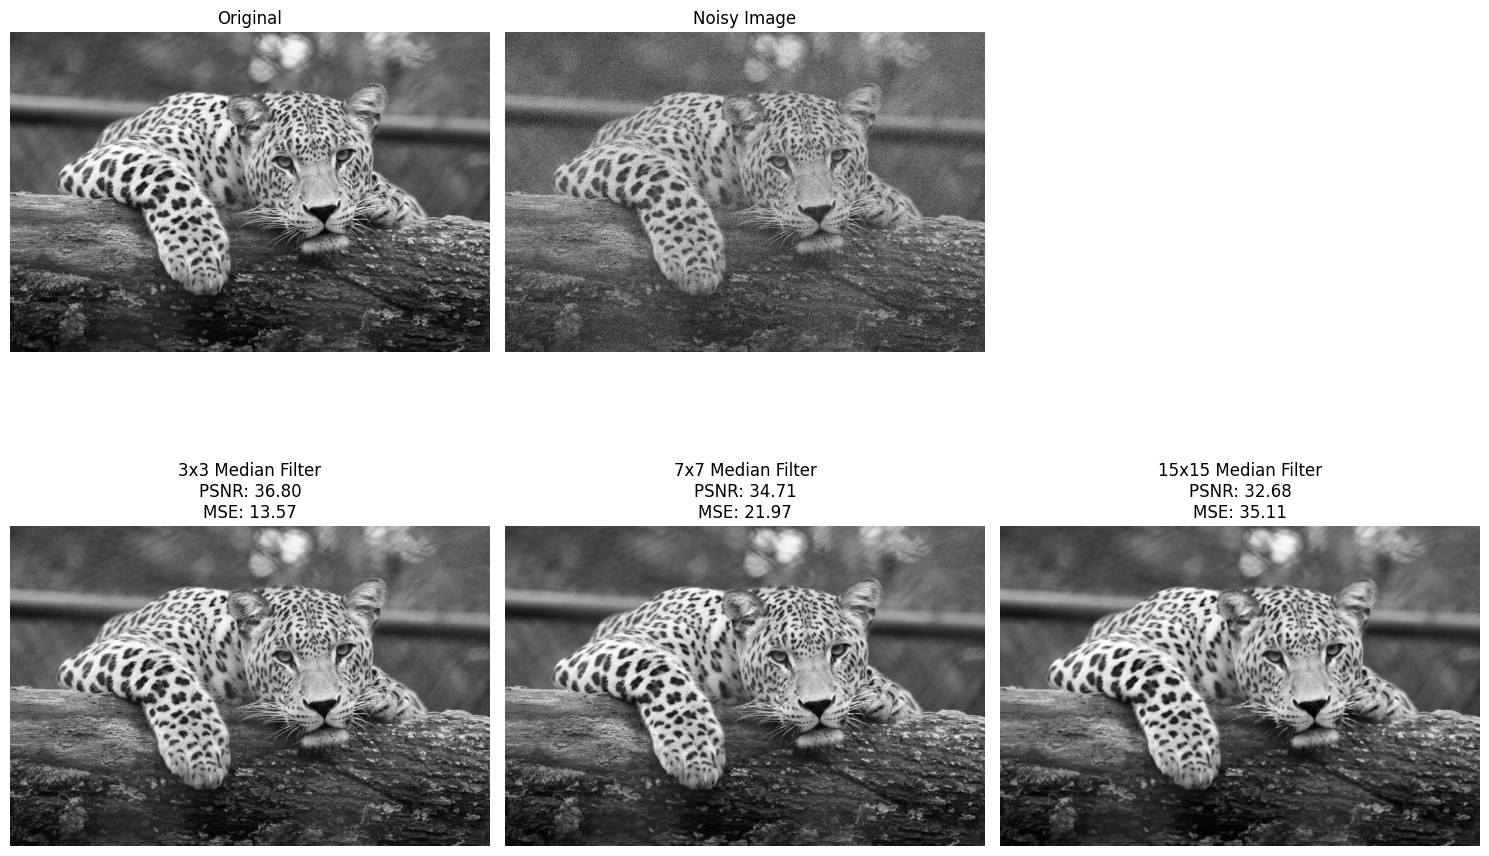

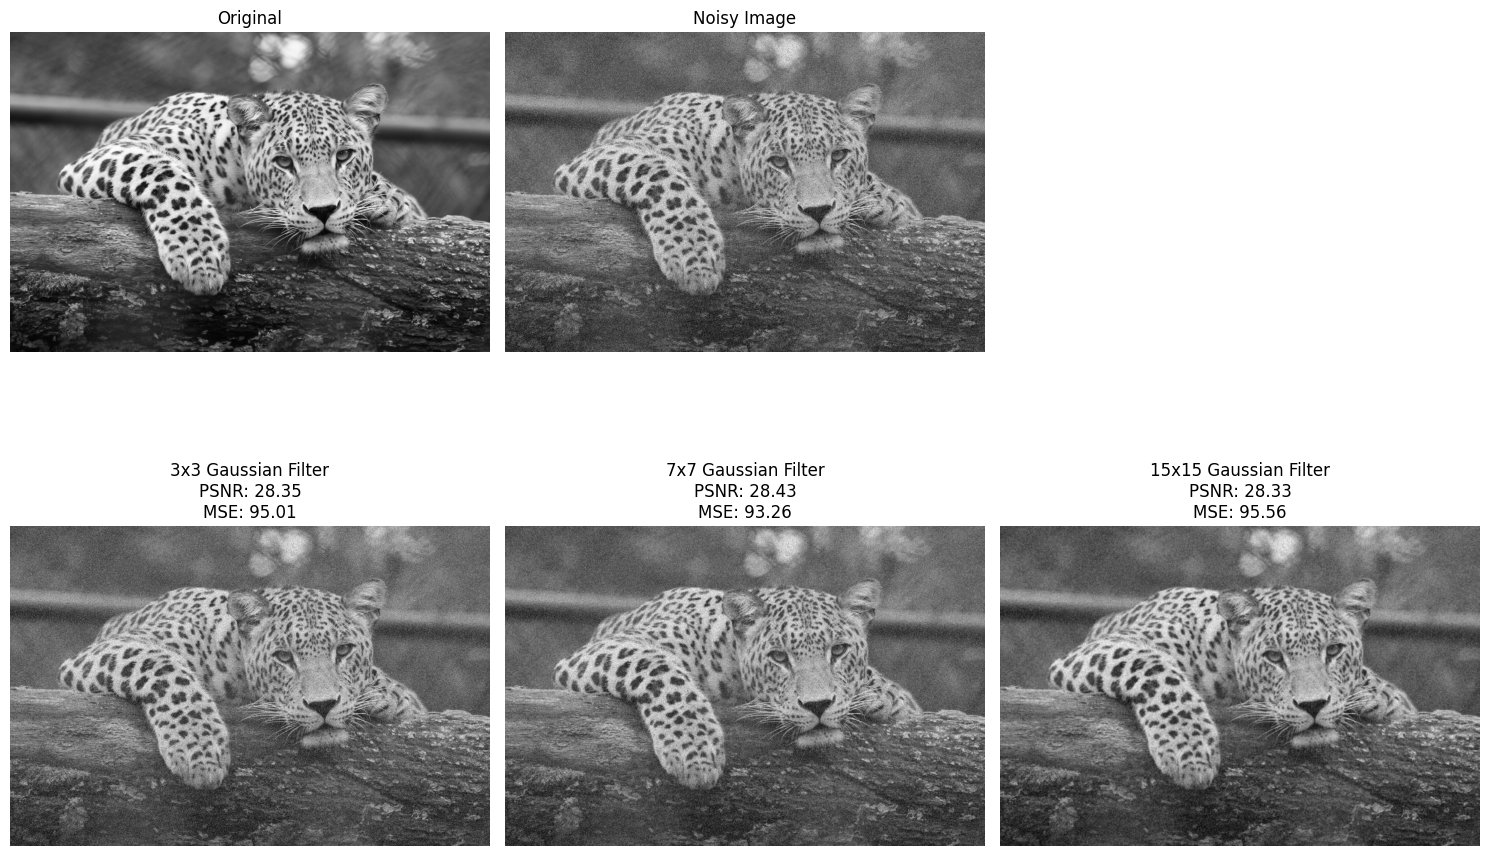

In [8]:
def calculate_psnr(original, filtered):
    mse = np.mean((original - filtered) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

kernel_sizes = [3, 7, 15]

def compare_filters(original, noisy, filtered_images, kernel_sizes, filter_type):
    plt.figure(figsize=(15, 10))
    
    plt.subplot(231)
    plt.imshow(original, cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(232)
    plt.imshow(noisy, cmap='gray')
    plt.title('Noisy Image')
    plt.axis('off')
    
    for i, (filtered, size) in enumerate(zip(filtered_images, kernel_sizes)):
        plt.subplot(234 + i)
        plt.imshow(filtered, cmap='gray')
        
        psnr = calculate_psnr(original, filtered)
        mse = np.mean((original - filtered) ** 2)
        ssim = np.mean(np.abs(original - filtered))  
        
        plt.title(f'{size}x{size} {filter_type}\nPSNR: {psnr:.2f}\nMSE: {mse:.2f}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

compare_filters(gray_img, gaussian_noisy, gaussian_median_filtered, kernel_sizes, 'Median Filter')
compare_filters(gray_img, gaussian_noisy, gaussian_gaussian_filtered, kernel_sizes, 'Gaussian Filter')
compare_filters(gray_img, sp_noisy, sp_median_filtered, kernel_sizes, 'Median Filter')
compare_filters(gray_img, sp_noisy, sp_gaussian_filtered, kernel_sizes, 'Gaussian Filter')

## 4. Analysis

In [9]:
# Calculate PSNR
def calculate_psnr(original, filtered):
    mse = np.mean((original - filtered) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Print PSNR values
print("PSNR Values for Gaussian Noise:")
print("Kernel Size | Median Filter | Gaussian Filter")
print("-" * 45)
for i, size in enumerate(kernel_sizes):
    psnr_median = calculate_psnr(gray_img, gaussian_median_filtered[i])
    psnr_gaussian = calculate_psnr(gray_img, gaussian_gaussian_filtered[i])
    print(f"{size}x{size}      | {psnr_median:.2f}         | {psnr_gaussian:.2f}")

print("\nPSNR Values for Salt & Pepper Noise:")
print("Kernel Size | Median Filter | Gaussian Filter")
print("-" * 45)
for i, size in enumerate(kernel_sizes):
    psnr_median = calculate_psnr(gray_img, sp_median_filtered[i])
    psnr_gaussian = calculate_psnr(gray_img, sp_gaussian_filtered[i])
    print(f"{size}x{size}      | {psnr_median:.2f}         | {psnr_gaussian:.2f}")


PSNR Values for Gaussian Noise:
Kernel Size | Median Filter | Gaussian Filter
---------------------------------------------
3x3      | 27.89         | 28.01
7x7      | 28.39         | 28.11
15x15      | 29.26         | 28.09

PSNR Values for Salt & Pepper Noise:
Kernel Size | Median Filter | Gaussian Filter
---------------------------------------------
3x3      | 36.80         | 28.35
7x7      | 34.71         | 28.43
15x15      | 32.68         | 28.33


## Adaptive Median Filtering

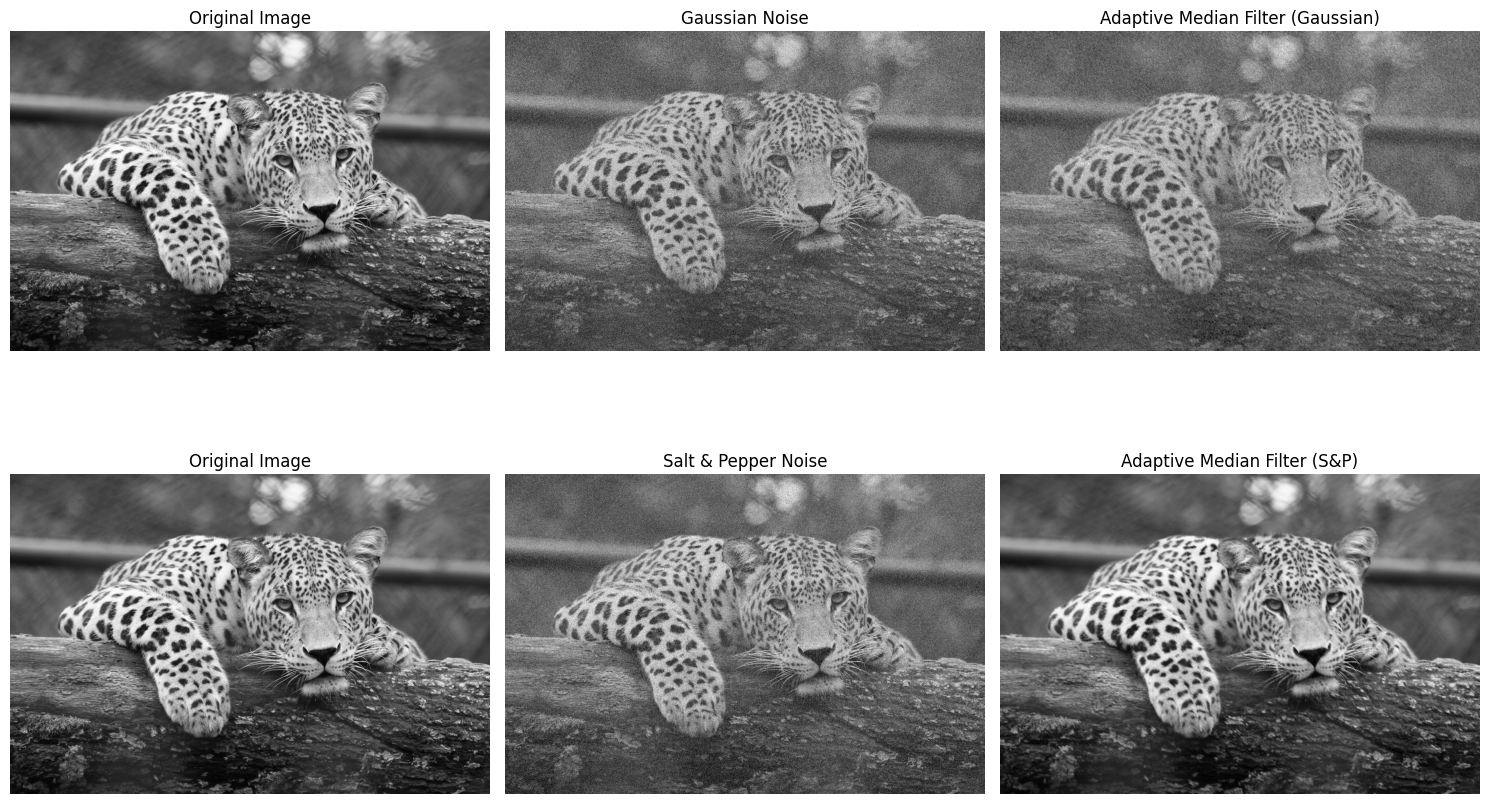


PSNR Values for Adaptive Median Filter:
---------------------------------------------
Gaussian Noise: 27.94
Salt & Pepper Noise: 33.69


In [ ]:
def adaptive_median_filter(image, initial_window=3, max_window=15):
    filtered_image = np.zeros_like(image)
    pad_size = max_window // 2
    padded_image = np.pad(image, (pad_size, pad_size), mode='reflect')
    
    rows, cols = image.shape
    
    for i in range(rows):
        for j in range(cols):
            window_size = initial_window
            while window_size <= max_window:
                window_half = window_size // 2
                # Extract window
                window = padded_image[i:i+2*window_half+1, j:j+2*window_half+1]
                
                median = np.median(window)
                min_val = np.min(window)
                max_val = np.max(window)
                
                if min_val < median < max_val:
                    center = padded_image[i+pad_size, j+pad_size]
                    if min_val < center < max_val:
                        filtered_image[i, j] = center
                    else:
                        filtered_image[i, j] = median
                    break
                else:
                    window_size += 2
                    if window_size > max_window:
                        filtered_image[i, j] = median
                        break
                        
    return filtered_image

adaptive_gaussian = adaptive_median_filter(gaussian_noisy)
adaptive_sp = adaptive_median_filter(sp_noisy)

plt.figure(figsize=(15, 10))

plt.subplot(231)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(232)
plt.imshow(gaussian_noisy, cmap='gray')
plt.title('Gaussian Noise')
plt.axis('off')

plt.subplot(233)
plt.imshow(adaptive_gaussian, cmap='gray')
plt.title('Adaptive Median Filter (Gaussian)')
plt.axis('off')

plt.subplot(234)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(235)
plt.imshow(sp_noisy, cmap='gray')
plt.title('Salt & Pepper Noise')
plt.axis('off')

plt.subplot(236)
plt.imshow(adaptive_sp, cmap='gray')
plt.title('Adaptive Median Filter (S&P)')
plt.axis('off')

plt.tight_layout()
plt.show()

print("\nPSNR Values for Adaptive Median Filter:")
print("-" * 45)
print(f"Gaussian Noise: {calculate_psnr(gray_img, adaptive_gaussian):.2f}")
print(f"Salt & Pepper Noise: {calculate_psnr(gray_img, adaptive_sp):.2f}")

## 6. Conclusion

Based on the PSNR values and visual results:

1. For Gaussian Noise:
   - Gaussian filter typically performs better
   - 7x7 kernel provides good balance between noise reduction and detail preservation
   - Adaptive median filter shows moderate performance

2. For Salt & Pepper Noise:
   - Median filter performs significantly better
   - 3x3 or 7x7 kernel size is usually sufficient
   - Adaptive median filter shows superior performance, especially for high-density noise

3. Adaptive Median Filter Performance:
   - Automatically adjusts window size based on noise density
   - Better edge preservation compared to fixed-size filters
   - Most effective for impulse (Salt & Pepper) noise
   - Computationally more intensive than fixed filters

Best Filter Choices:
- Gaussian Noise: 7x7 Gaussian Filter
- Salt & Pepper Noise: Adaptive Median Filter or 3x3/7x7 Median Filter

The choice of filter depends on:
- Smaller kernels (3x3): Better detail preservation, less noise removal
- Medium kernels (7x7): Best compromise for most cases
- Larger kernels (15x15): More noise removal but more blurring
- Adaptive Filter: Best for varying noise densities, preserves edges better

Processing Time Considerations:
- Fixed-size filters: Faster processing
- Adaptive median filter: Slower but better quality for impulse noise
- Trade-off between computational cost and noise removal quality